In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append('../../..')
from src import rotated_embryo, load_image, data_path
%matplotlib widget

if not os.path.exists('Figs'):
    os.mkdir('Figs')

In [2]:
df = pd.read_csv('../../Run/mlc-4 RNAi/df.csv')

wt_path1 = df[df.EmbryoID == 1651762677].Path.to_list()[0]
wt_path2 = df[df.EmbryoID == 1651765978].Path.to_list()[0]
gcn4_path = df[df.EmbryoID == 1651686192].Path.to_list()[0]

wt_paths = df[df.Line == 'lp637'].Path.to_list()
gcn4_paths =  df[df.Line == 'nwg376'].Path.to_list()

In [5]:
def single_panel(ax, img, roi, vmax, scale_bar=False):
    rotated = rotated_embryo(img, roi, 240, 170, 3)
    print(np.percentile(rotated, 99.9))
    ax.imshow(rotated, cmap='gray', vmin=0, vmax=vmax)
    ax.set_xticks([])
    ax.set_yticks([])
    
    if scale_bar:
        px = 0.255 # pixel size
        bar_length = 10  # microns
        bar_pixels = bar_length / px
        y = rotated.shape[0] - 10
        ax.plot([rotated.shape[1]-10-bar_pixels, rotated.shape[1]-10], [y, y], color='w', linewidth=1.5)

    
def row(ax, path, vmax=29290.594246089513):
    roi = np.loadtxt(path + '/ROI_manual.txt')
    img = load_image(path + '/af_corrected.tif')
    
    # NEBD timepoint
    timepoint = int(np.loadtxt(path + '/NEBD.txt'))
    print(timepoint)
    
    # NEBD - 3
    single_panel(ax[0], img[timepoint - 6], roi, vmax, scale_bar=True)
    
    # NEBD
    single_panel(ax[1], img[timepoint], roi, vmax)
    
    # NEBD + 3
    single_panel(ax[2], img[timepoint + 6], roi, vmax)

<IPython.core.display.Javascript object>


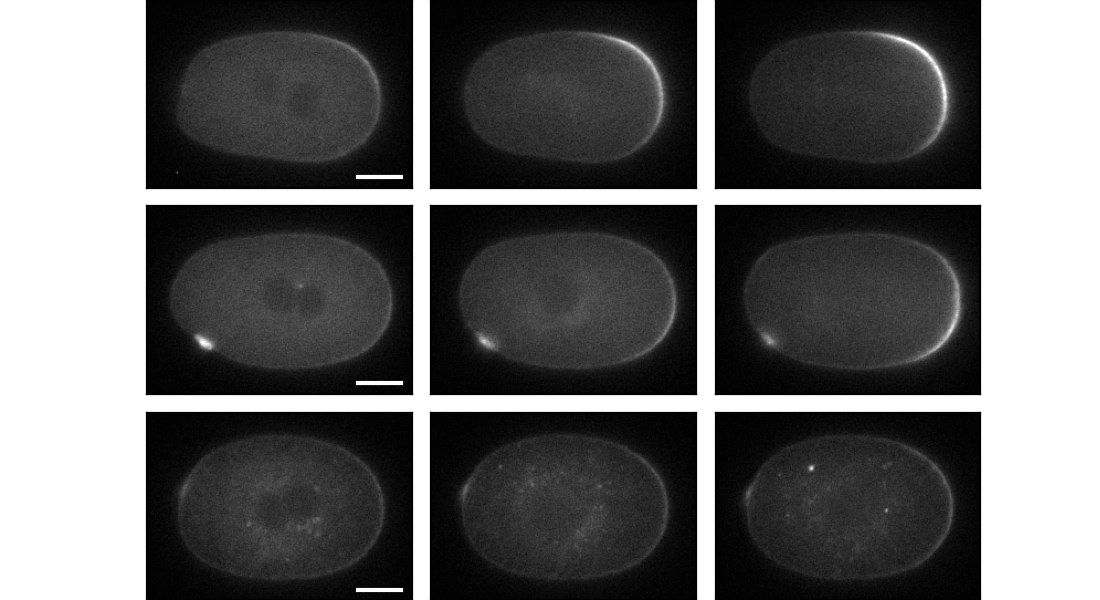

7
12807.145479358876
22217.24263525296
29290.594246089513
18
22914.743717461493
16831.52708205619
21402.656444852713
16
9959.082905733621
10136.03182893881
10657.857719777912


In [6]:
if data_path:
    fig, ax = plt.subplots(3, 3)
    row(ax[0], wt_paths[0])
    row(ax[1], wt_paths[1])
    row(ax[2], gcn4_paths[0])
    fig.set_size_inches(5.5,3)
    fig.subplots_adjust(wspace=0, top=1, bottom=0, hspace=0.1)
    fig.savefig('Figs/saibr_wt_gcn4.png', dpi=600, transparent=True)